## ANN Model

In [5]:
# For working with numbers and data
import numpy as np
import pandas as pd

# For making graphs and charts
import seaborn as sns
import matplotlib.pyplot as plt

# For converting text labels to numbers and scaling data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# For splitting the data into training and testing
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.svm import SVC                             # Support Vector Machine
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.ensemble import StackingClassifier         # Combining models

# For checking model accuracy and performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# For deep learning (neural networks)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping    # To stop training early if needed

# To ignore warning messages
import warnings
warnings.filterwarnings("ignore")

In [6]:
import numpy as np  # Importing NumPy for loading .npz files

# Load the previously saved train-test split from the .npz file
data = np.load('Dataset/train_test_split.npz')

# Extract the training features
X_train = data['X_train']

# Extract the testing features
X_test = data['X_test']

# Extract the training labels
y_train = data['y_train']

# Extract the testing labels
y_test = data['y_test']


In [7]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="selu"), 
    layers.Dense(32, activation='selu'),
    layers.Dense(16, activation='selu'),
    layers.Dense(4, activation="softmax")  
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, 
                    callbacks=[early_stopping], validation_split=0.2)

Epoch 1/50
7002/7002 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8862 - loss: 0.3003 - val_accuracy: 0.9427 - val_loss: 0.1520
Epoch 2/50
7002/7002 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9556 - loss: 0.1214 - val_accuracy: 0.9570 - val_loss: 0.1092
Epoch 3/50
7002/7002 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9574 - loss: 0.1135 - val_accuracy: 0.9574 - val_loss: 0.1122
Epoch 4/50
7002/7002 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9596 - loss: 0.1083 - val_accuracy: 0.9583 - val_loss: 0.1084
Epoch 5/50
7002/7002 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9607 - loss: 0.1042 - val_accuracy: 0.9609 - val_loss: 0.0973
Epoch 6/50
7002/7002 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9625 - loss: 0.1001 - val_accuracy: 0.9621 - val_loss: 0.0975
Epoch 7/50
7002/7002 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9628 - loss: 0.0979 - val_accuracy: 0.9612 - val_loss: 0.0990
Epoch 8/50
7002/7002 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9628 - loss: 0

In [8]:
test_loss, ann_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", round(ann_accuracy, 3))

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class)

1876/1876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9635 - loss: 0.0935
Test accuracy: 0.964
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[3 0 1 ... 3 1 1]


In [9]:
class_report = classification_report(y_test, y_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     12784
           1       0.95      0.98      0.96     19820
           2       0.97      0.96      0.97     12092
           3       1.00      1.00      1.00     15317

    accuracy                           0.96     60013
   macro avg       0.97      0.96      0.96     60013
weighted avg       0.96      0.96      0.96     60013



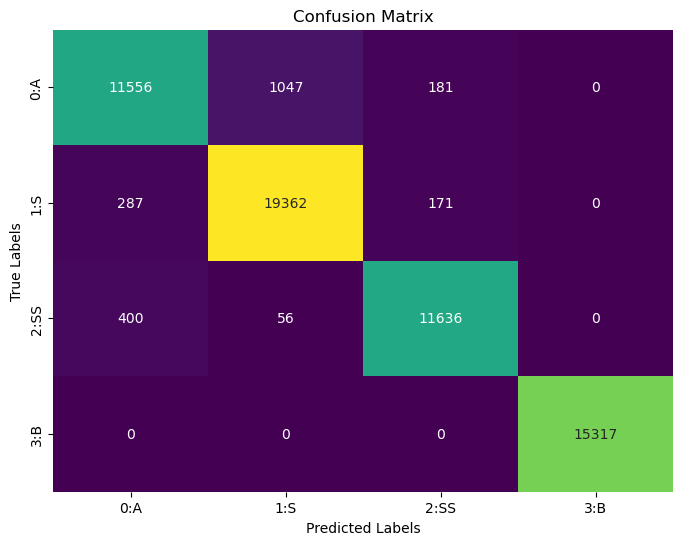

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=["0:A", "1:S", "2:SS", "3:B"], yticklabels=["0:A", "1:S", "2:SS", "3:B"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# False Positives per class: sum of column minus diagonal
false_positives_per_class = conf_matrix.sum(axis=0) - np.diag(conf_matrix)

# Total False Positives
ann_tfp = false_positives_per_class.sum()

# Display
print("\n🚨 False Positives Per Class:")
for i, fp in enumerate(false_positives_per_class):
    print(f"  ➤ Class {i} (Label: {'A' if i==0 else 'S' if i==1 else 'SS' if i==2 else 'B'}): {fp}")

print("\n❗ Total False Positives:", ann_tfp)


🚨 False Positives Per Class:
  ➤ Class 0 (Label: A): 687
  ➤ Class 1 (Label: S): 1103
  ➤ Class 2 (Label: SS): 352
  ➤ Class 3 (Label: B): 0

❗ Total False Positives: 2142


In [12]:
# Save the full model
model.save("Model/ann_model.keras")